In [1]:
import pandas as pd

In [2]:
Data=pd.read_excel("http://data.hossam.kr/E04/beans.xlsx")
data=pd.DataFrame(Data)

## 데이터 확인

In [8]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 데이터의 정규성 검정

In [11]:
sp.stats.shapiro(data["강도"])

ShapiroResult(statistic=0.8926892280578613, pvalue=0.18178628385066986)

In [13]:
sp.stats.shapiro(data['수분함유량'])

ShapiroResult(statistic=0.9497249722480774, pvalue=0.6652477383613586)

## 등분산성 검정

In [15]:
sp.stats.bartlett(data["강도"],data["수분함유량"])

BartlettResult(statistic=0.4112650335691198, pvalue=0.5213281216818642)

## 시각화

In [25]:
plt.rcParams["font.family"] = 'BM YEONSUNG'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (5, 4)
plt.rcParams["axes.unicode_minus"] = False

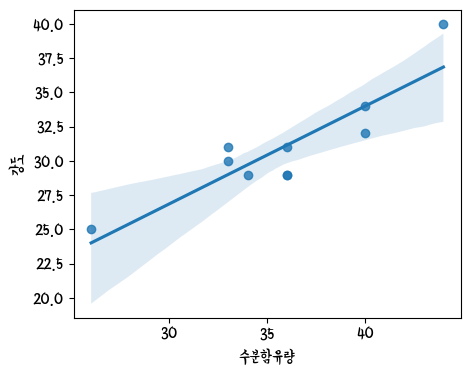

In [26]:
plt.figure()
sns.regplot(data=data, x=data.columns[0],y=data.columns[1])
plt.show()

## 추론통계

### 1. 상관분석
+ 연속형 변수이므로 pearson 상관분석

In [27]:
sp.stats.pearsonr(data["강도"],data["수분함유량"])

PearsonRResult(statistic=0.8880516689960796, pvalue=0.0005990724739320328)

> pearson 상관분석 결과 p-value < 0.05 이므로 $H_0$를 기각하고 $H_1$을 채택<br>
> 강도와 수분함유량 사이의 양의 상관관계가 있다

### 2. 회귀 분석

In [28]:
import statsmodels.formula.api as smf
import statsmodels.stats.anova as anova

In [30]:
model=smf.ols(formula="강도~수분함유량",data=data)

In [34]:
print(model.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                     강도   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     29.85
Date:                Mon, 24 Jul 2023   Prob (F-statistic):           0.000599
Time:                        16:41:18   Log-Likelihood:                -19.614
No. Observations:                  10   AIC:                             43.23
Df Residuals:                       8   BIC:                             43.83
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.4991      4.707      1.168      0.2

c:\Users\SAMSUNG\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


## 회귀분석을 통한 결과해석

### 1. $R^2$
> 강도와 수분함유량 사이의 관계를 약 79%정도 설명하고 있다.

### 2. $ADJ$ $R^2$
> independent variable의 개수가 1개 이므로($n=1$) $R^2$의 값을 사용하겠다 

### 3. $F-statistic$

> $F(1,8)=29.85$ , $p-value<0.05$ 이므로 회귀모형이 유의미함

### 4. $AIC,BIC$
> AIC : 회귀분석 모델이 해당 데이터에 얼마나 적합한지를 나타내는 것<br>
> BIC : 독립변수의 수가 증가할수록 AIC값엔 없는 패널티를 부과해 더 정확한 값을 유추<br><br>
> 다만 해당 모델의 independant variable의 수가 1이므로 AIC값을 봐도 상관없음

## 해석

## 도출된 Regrassion
#### $강도=(0.7123)*수분함유량+5.4991$

> 각각의 p-value를 살펴보면,<br>
> intercept(y절편)의 설명력은 낮지만 (p>0.05)<br>
> 가중치의 설명력은 높다<p<0.05>>

## 결과보고

### 수분함유량에 따른 강도를 분석하기 위한 Regression을 실시한 결과, 해당 모델은 통계적으로 유의미했다.
>$F(1,8)=29.85$ <br>
>$p-value<0.05$

### Independant variable

> 수분함유량에 대한 설명력은 높다 <br>
> t(48)=5.463<br>
> $p-value<0.05$